In [706]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [707]:
bitcoin_df = pd.read_csv('dataset/yahoo_btc.csv')

In [708]:
bitcoin_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


In [709]:
bitcoin_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2654,2022-04-08,43505.136719,43903.019531,42183.289063,42287.664063,42287.664063,27215995394
2655,2022-04-09,42282.078125,42786.816406,42183.253906,42782.136719,42782.136719,16050772496
2656,2022-04-10,42781.089844,43376.378906,42021.207031,42207.671875,42207.671875,17654475582
2657,2022-04-11,42201.039063,42424.589844,39373.058594,39521.902344,39521.902344,33949912166
2658,2022-04-12,39635.402344,40617.144531,39405.457031,40145.093750,40145.093750,38557118464


In [710]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2659 entries, 0 to 2658
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2659 non-null   object 
 1   Open       2659 non-null   float64
 2   High       2659 non-null   float64
 3   Low        2659 non-null   float64
 4   Close      2659 non-null   float64
 5   Adj Close  2659 non-null   float64
 6   Volume     2659 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 145.5+ KB


In [711]:
bitcoin_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2.659000e+03
mean,12343.804578,12671.140249,11984.232714,12356.998936,12356.998936,1.553667e+10
std,16649.849769,17088.131774,16148.739467,16652.894734,16652.894734,2.009057e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,7.860650e+06
25%,702.864502,710.012512,688.683502,703.182983,703.182983,1.079270e+08
50%,6599.709961,6735.463867,6468.859863,6597.549805,6597.549805,5.955691e+09
75%,11168.534180,11468.219238,10859.070801,11185.703125,11185.703125,2.608698e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [712]:
bitcoin_df = bitcoin_df.drop(['Adj Close'], axis=1)

In [713]:
bitcoin_df.head()

,Date,Open,High,Low,Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,8036550
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800


In [714]:
bitcoin_df.shape

(2659, 6)

In [715]:
bitcoin_df["Close in x days"] = bitcoin_df["Close"]

In [716]:
bitcoin_df.head()

,Date,Open,High,Low,Close,Volume,Close in x days
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,8036550,314.248993
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650,315.032013
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400,281.082001
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100,264.195007
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800,274.473999


In [717]:
# Choose our target value
features = ['Open', 'High', 'Low', 'Volume', 'Close']
target = 'Close in x days'

In [718]:
target_df = pd.DataFrame(bitcoin_df[target])

In [719]:
target_df.head()

,Close in x days
0,314.248993
1,315.032013
2,281.082001
3,264.195007
4,274.473999


In [720]:
target_df = target_df.reindex(np.roll(target_df.index, -7))

In [721]:
target_df = target_df.reset_index().drop(['index'], axis=1)
target_df.head()

,Close in x days
0,283.348999
1,290.407990
2,274.795990
3,265.660004
4,267.795990


In [722]:
bitcoin_df[target] = target_df

In [723]:
bitcoin_df[:20]

,Date,Open,High,Low,Close,Volume,Close in x days
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,8036550,283.348999
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650,290.407990
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400,274.795990
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100,265.660004
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800,267.795990
5,2015-01-06,274.610992,287.553009,272.696014,286.188995,23245700,225.860992
6,2015-01-07,286.076996,298.753998,283.079010,294.337006,24866800,178.102997
7,2015-01-08,294.135010,294.135010,282.174988,283.348999,19982500,209.843994
8,2015-01-09,282.382996,291.114014,280.532990,290.407990,18718600,208.097000
9,2015-01-10,287.303009,288.127014,273.966003,274.795990,15264300,199.259995


In [724]:
bitcoin_df = bitcoin_df.iloc[:-7]

In [725]:
bitcoin_df.shape

(2652, 7)

In [726]:
x_train, x_test, y_train, y_test = train_test_split(bitcoin_df[features],bitcoin_df[target],test_size = 0.3,shuffle=False)

In [727]:
composite_pipeline = make_pipeline(StandardScaler(with_mean=False), LinearRegression(fit_intercept=False))
linear_model = composite_pipeline.fit(x_train, y_train)

In [728]:
print("Training score : " , linear_model.score(x_train, y_train))

Training score :  0.9634736167755873


In [729]:
prediction = linear_model.predict(x_test)

In [730]:
df_pred_actual = pd.DataFrame({'predicted': prediction, 'actual': y_test})
df_pred_actual["date"] = bitcoin_df["Date"].tail(796)

In [731]:
df_pred_actual

,predicted,actual,date
1856,9376.296466,9795.943359,2020-01-31
1857,9353.189211,9865.119141,2020-02-01
1858,9372.781501,10116.673828,2020-02-02
1859,9330.466676,9856.611328,2020-02-03
1860,9198.878746,10208.236328,2020-02-04
...,...,...,...
2647,45731.439163,42287.664063,2022-04-01
2648,45023.037025,42782.136719,2022-04-02
2649,45660.403580,42207.671875,2022-04-03
2650,45873.360574,39521.902344,2022-04-04


Text(0, 0.5, 'Price in USD')

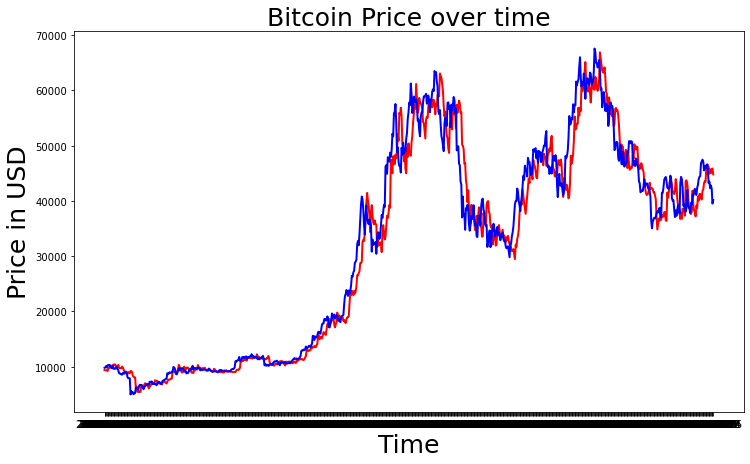

In [732]:
plt.figure(figsize = (12, 7))
plt.plot(df_pred_actual['date'], df_pred_actual['predicted'], color='red', lw=2)
plt.plot(df_pred_actual['date'], df_pred_actual['actual'], color='blue', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=25)
plt.ylabel("Price in USD", size=25)